In [43]:
import pandas as pd
import matplotlib.pyplot as pyplot

In [44]:
def top10_values(df,year):
    df_actual = df[year]
    df_sorted = df_actual.sort_values(ascending=False)
    df_top = df_sorted.reset_index().head(10)
    df_top.index = df_top.index+1
    
    return df_top.round(2)


In [45]:
def pieplot(df,numofyear,title):
    
    pyplot.figure(figsize=(12,20))
    
    total_num_of_years = len(df.columns)
    
    for i in range(numofyear):
        
        pyplot.subplot(numofyear,2,i+1)
        
        
        df_orig = df.iloc[:,total_num_of_years - (i+1):total_num_of_years -i]
        col = list(df_orig)
        year = ''.join(col)
        df_sorted = df_orig.sort_values(by=year,ascending=False)
        
        df_sorted = df_sorted.reset_index()
        df_sorted.index = df_sorted.index + 1
        others = df_sorted[10:].sum()[1]
        top10 = df_sorted[:10]
        top10.loc[11] = ['Other Countries',others]
        
        
        ax = top10[year].plot.pie(subplots=False,autopct='%0.1f',fontsize=12,legend=False,
                                labels=top10['Country Name'],shadow=False,explode=(0,0,0,0,0,0,0,0,0,0,0),
                                startangle=90
                               )
        
        ax.set_xlabel(year)
        ax.set_ylabel("")
        pyplot.title(title)

In [46]:
def multilineplot(df,top,Xlabel,Ylabel,title):
    
    df_top_10 = pd.DataFrame()
    for i in range(len(top)):
        df_temp = df.loc[top.loc[i,'Country Name']]
        df_plot = pd.DataFrame({'Year':df_temp.index, top.loc[i,'Country Name']:df_temp.values})
        df_plot['Year'] = df_plot['Year'].astype('int')
        df_top_10 = pd.concat([df_top_10, df_plot], axis=1, join_axes=[df_plot.index])
        
    df_top_10 = df_top_10.loc[:,~df_top_10.columns.duplicated()]
    df_top_10_plot = df_top_10.set_index('Year')
    df_top_10_plot.plot()

    pyplot.plot(df_top_10_plot)
    pyplot.legend()
    pyplot.xlabel(Xlabel)
    pyplot.ylabel(Ylabel)
    pyplot.title(title)

<h3>CO2 EMISSION ANALYSIS</h3>

In [47]:
co2emission = pd.read_csv("/BusinessIntelligence/Datasets/CO2Emissions/co2emissions_data_worldbank.csv",index_col=False,header=2)

co2emission = co2emission[co2emission.columns[:-5]]
del co2emission['Indicator Name']
del co2emission['Indicator Code']

co2emission= co2emission.fillna(0)
co2emission

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Aruba,ABW,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.720914e+03,2.717247e+03,2.823590e+03,2.658575e+03,2.629239e+03,2.508228e+03,2.500894e+03,1.349456e+03,8.617450e+02,8.727460e+02
1,Afghanistan,AFG,4.143710e+02,4.913780e+02,6.893960e+02,7.077310e+02,8.397430e+02,1.008425e+03,1.092766e+03,1.283450e+03,...,1.327454e+03,1.650150e+03,2.273540e+03,4.206049e+03,6.769282e+03,8.463436e+03,1.224045e+04,1.075531e+04,1.001458e+04,9.809225e+03
2,Angola,AGO,5.500500e+02,4.547080e+02,1.180774e+03,1.151438e+03,1.224778e+03,1.188108e+03,1.554808e+03,9.937570e+02,...,1.915641e+04,2.226602e+04,2.515195e+04,2.570934e+04,2.779219e+04,2.905731e+04,3.034076e+04,3.339904e+04,3.261797e+04,3.476316e+04
3,Albania,ALB,2.024184e+03,2.280874e+03,2.464224e+03,2.082856e+03,2.016850e+03,2.174531e+03,2.552232e+03,2.680577e+03,...,4.253720e+03,3.898021e+03,3.927357e+03,4.374731e+03,4.378398e+03,4.598418e+03,5.240143e+03,4.910113e+03,5.064127e+03,5.716853e+03
4,Andorra,AND,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,5.757190e+02,5.463830e+02,5.390490e+02,5.390490e+02,5.170470e+02,5.170470e+02,4.913780e+02,4.877110e+02,4.767100e+02,4.620420e+02
5,Arab World,ARB,5.953540e+04,6.511982e+04,7.432201e+04,8.785379e+04,1.031467e+05,1.237688e+05,1.390124e+05,1.496591e+05,...,1.318345e+06,1.381942e+06,1.359856e+06,1.491970e+06,1.581328e+06,1.645559e+06,1.655808e+06,1.796962e+06,1.775096e+06,1.895700e+06
6,United Arab Emirates,ARE,1.100100e+01,1.100100e+01,1.833500e+01,2.200200e+01,1.833500e+01,2.200200e+01,2.566900e+01,9.167500e+02,...,1.161486e+05,1.238749e+05,1.356277e+05,1.573546e+05,1.679596e+05,1.608126e+05,1.654404e+05,1.763864e+05,1.707062e+05,2.113695e+05
7,Argentina,ARG,4.881510e+04,5.118032e+04,5.369588e+04,5.008389e+04,5.572740e+04,5.886635e+04,6.313841e+04,6.554396e+04,...,1.621107e+05,1.754366e+05,1.751763e+05,1.891072e+05,1.799617e+05,1.879191e+05,1.916338e+05,1.923562e+05,1.898516e+05,2.040245e+05
8,Armenia,ARM,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.352729e+03,4.382065e+03,5.064127e+03,5.559172e+03,4.360063e+03,4.217050e+03,4.917447e+03,5.694851e+03,5.496833e+03,5.529836e+03
9,American Samoa,ASM,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [48]:
metadata_country_co2 = pd.read_csv("/BusinessIntelligence/Datasets/CO2Emissions/metadata_country_co2emission.csv",header=0)
metadata_country_co2 = metadata_country_co2[['Country Code', 'Region', 'IncomeGroup']]
metadata_country_co2 = metadata_country_co2.dropna()


In [49]:
co2emision_metadata_merged = co2emission.merge(metadata_country_co2,on=['Country Code'])
co2emision_metadata_merged = co2emision_metadata_merged.set_index(['Country Name'])
del  co2emision_metadata_merged['Country Code']
del  co2emision_metadata_merged['Region']
del  co2emision_metadata_merged['IncomeGroup']

co2emision_metadata_merged.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,2720.914,2717.247,2823.590,2658.575,2629.239,2508.228,2500.894,1349.456,861.745,872.746
Afghanistan,414.371,491.378,689.396,707.731,839.743,1008.425,1092.766,1283.450,1224.778,942.419,...,1327.454,1650.150,2273.540,4206.049,6769.282,8463.436,12240.446,10755.311,10014.577,9809.225
Angola,550.050,454.708,1180.774,1151.438,1224.778,1188.108,1554.808,993.757,1672.152,2786.920,...,19156.408,22266.024,25151.953,25709.337,27792.193,29057.308,30340.758,33399.036,32617.965,34763.160
Albania,2024.184,2280.874,2464.224,2082.856,2016.850,2174.531,2552.232,2680.577,3072.946,3245.295,...,4253.720,3898.021,3927.357,4374.731,4378.398,4598.418,5240.143,4910.113,5064.127,5716.853
Andorra,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,575.719,546.383,539.049,539.049,517.047,517.047,491.378,487.711,476.710,462.042


In [50]:
top10_co2emittors = top10_values(co2emision_metadata_merged,'2014')
top10_co2emittors


,Country Name,2014
1,China,10291926.88
2,United States,5254279.28
3,India,2238377.14
4,Russian Federation,1705345.68
5,Japan,1214048.36
6,Germany,719883.44
7,"Iran, Islamic Rep.",649480.70
8,Saudi Arabia,601046.97
9,"Korea, Rep.",587156.37
10,Canada,537193.50


In [51]:
total_co2emissions_per_year = co2emision_metadata_merged.sum()
total_co2emissions_per_year

1960    6.623500e+06
1961    6.538503e+06
1962    6.722337e+06
1963    7.067922e+06
1964    7.434663e+06
1965    7.818495e+06
1966    8.215059e+06
1967    8.481804e+06
1968    8.999819e+06
1969    9.660425e+06
1970    1.063380e+07
1971    1.100669e+07
1972    1.157138e+07
1973    1.222262e+07
1974    1.209923e+07
1975    1.201359e+07
1976    1.267890e+07
1977    1.309275e+07
1978    1.361383e+07
1979    1.404203e+07
1980    1.384315e+07
1981    1.347353e+07
1982    1.335157e+07
1983    1.347894e+07
1984    1.394514e+07
1985    1.433589e+07
1986    1.457743e+07
1987    1.511743e+07
1988    1.576923e+07
1989    1.618748e+07
1990    1.597021e+07
1991    1.725433e+07
1992    2.121355e+07
1993    2.143096e+07
1994    2.150602e+07
1995    2.193573e+07
1996    2.254193e+07
1997    2.260906e+07
1998    2.255501e+07
1999    2.292272e+07
2000    2.360133e+07
2001    2.378506e+07
2002    2.430508e+07
2003    2.556235e+07
2004    2.676228e+07
2005    2.767461e+07
2006    2.868555e+07
2007    2.950

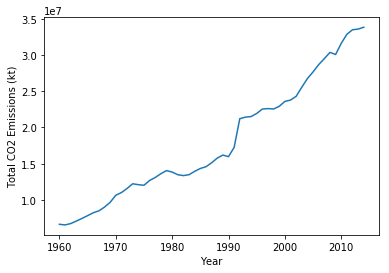

In [52]:
df_total_co2emissions_per_year = pd.DataFrame({'Year':total_co2emissions_per_year.index, 'TotalCO2':total_co2emissions_per_year.values})
df_total_co2emissions_per_year['Year'] = df_total_co2emissions_per_year['Year'].astype('int')
pyplot.xlabel("Year")
pyplot.ylabel("Total CO2 Emissions (kt)")
pyplot.plot(df_total_co2emissions_per_year['Year'],df_total_co2emissions_per_year['TotalCO2'])
pyplot.show()


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

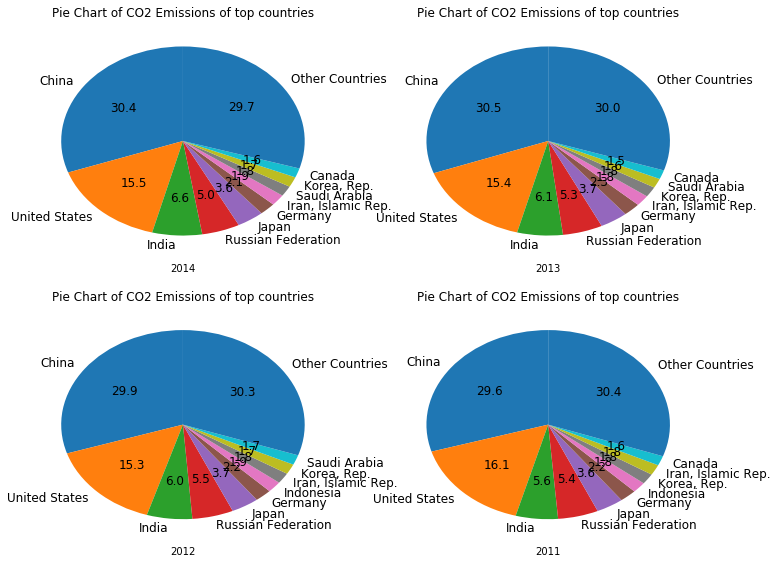

In [53]:
pieplot(co2emision_metadata_merged,4,"Pie Chart of CO2 Emissions of top countries")
pyplot

In [42]:
top10_test = top10_co2emittors.reset_index(drop=True)
top10_test.loc[0,'Country Name']
tmp = co2emision_metadata_merged.loc[top10_test.loc[0,'Country Name']]

df_total_co2emissions_per_year = pd.DataFrame({'Year':tmp.index, top10_test.loc[0,'Country Name']:tmp.values})
df_total_co2emissions_per_year['Year'] = df_total_co2emissions_per_year['Year'].astype('int')

df_total_co2emissions_per_year.head(10)
#df_total_co2emissions_per_year.index.name = top10_test.loc[0,'Country Name']

,China,Year
0,780726.302,1960
1,552066.850,1961
2,440359.029,1962
3,436695.696,1963
4,436923.050,1964
5,475972.933,1965
6,522789.522,1966
7,433234.048,1967
8,468928.626,1968
9,577237.138,1969


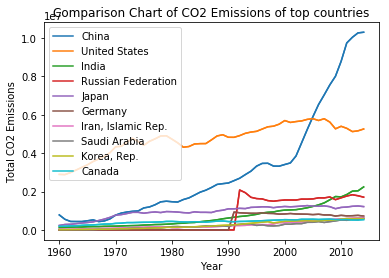

In [54]:
multilineplot(co2emision_metadata_merged,top10_co2emittors.reset_index(drop=True),'Year', 'Total CO2 Emissions','Comparison Chart of CO2 Emissions of top countries' )

<h3>GDP ANALYSIS</h3>

In [75]:
gdp = pd.read_csv("/BusinessIntelligence/Datasets/GDP/gdp_data_worldbank.csv",index_col=False,header=2)
gdp = gdp[gdp.columns[:-5]]

del gdp['Indicator Name']
del gdp['Indicator Code']

gdp= gdp.fillna(0)

gdp.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Aruba,ABW,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.330726e+09,2.424581e+09,2.615084e+09,2.745251e+09,2.498883e+09,2.390503e+09,2.549721e+09,2.534637e+09,2.581564e+09,2.649721e+09
1,Afghanistan,AFG,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,...,6.209138e+09,6.971286e+09,9.747880e+09,1.010923e+10,1.243909e+10,1.585657e+10,1.780429e+10,1.990732e+10,2.056107e+10,2.048489e+10
2,Angola,AGO,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,3.697092e+10,5.238101e+10,6.526645e+10,8.853861e+10,7.030716e+10,8.379950e+10,1.117897e+11,1.280529e+11,1.367099e+11,1.457122e+11
3,Albania,ALB,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,8.052074e+09,8.896073e+09,1.067732e+10,1.288135e+10,1.204421e+10,1.192696e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322825e+10
4,Andorra,AND,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,3.255789e+09,3.543257e+09,4.016972e+09,4.007353e+09,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09


In [76]:
metadata_country_gdp = pd.read_csv("/BusinessIntelligence/Datasets/GDP/metadata_country_gdp.csv",header=0)
metadata_country_gdp = metadata_country_gdp[['Country Code', 'Region', 'IncomeGroup']]
metadata_country_gdp = metadata_country_gdp.dropna()
metadata_country_gdp.head()

,Country Code,Region,IncomeGroup
0,ABW,Latin America & Caribbean,High income
1,AFG,South Asia,Low income
2,AGO,Sub-Saharan Africa,Lower middle income
3,ALB,Europe & Central Asia,Upper middle income
4,AND,Europe & Central Asia,High income


In [77]:
gdp_metadata_merged = gdp.merge(metadata_country_gdp,on=['Country Code'])
gdp_metadata_merged = gdp_metadata_merged.set_index(['Country Name'])
del  gdp_metadata_merged['Country Code']
del  gdp_metadata_merged['Region']
del  gdp_metadata_merged['IncomeGroup']
gdp_metadata_merged.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.330726e+09,2.424581e+09,2.615084e+09,2.745251e+09,2.498883e+09,2.390503e+09,2.549721e+09,2.534637e+09,2.581564e+09,2.649721e+09
Afghanistan,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,1.373333e+09,1.408889e+09,...,6.209138e+09,6.971286e+09,9.747880e+09,1.010923e+10,1.243909e+10,1.585657e+10,1.780429e+10,1.990732e+10,2.056107e+10,2.048489e+10
Angola,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,3.697092e+10,5.238101e+10,6.526645e+10,8.853861e+10,7.030716e+10,8.379950e+10,1.117897e+11,1.280529e+11,1.367099e+11,1.457122e+11
Albania,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,8.052074e+09,8.896073e+09,1.067732e+10,1.288135e+10,1.204421e+10,1.192696e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322825e+10
Andorra,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,3.255789e+09,3.543257e+09,4.016972e+09,4.007353e+09,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09


In [78]:
top10_gdp = top10_values(gdp_metadata_merged,'2014')
top10_gdp

,Country Name,2014
1,United States,1.742761e+13
2,China,1.048237e+13
3,Japan,4.850414e+12
4,Germany,3.890607e+12
5,United Kingdom,3.022828e+12
6,France,2.852166e+12
7,Brazil,2.455994e+12
8,Italy,2.151733e+12
9,Russian Federation,2.063663e+12
10,India,2.039127e+12


In [79]:
gdp_per_year = gdp_metadata_merged.sum()
gdp_per_year

1960    1.159182e+12
1961    1.205625e+12
1962    1.318758e+12
1963    1.419847e+12
1964    1.555697e+12
1965    1.701663e+12
1966    1.846216e+12
1967    1.970376e+12
1968    2.132352e+12
1969    2.347834e+12
1970    2.781675e+12
1971    3.072584e+12
1972    3.543459e+12
1973    4.316824e+12
1974    4.976801e+12
1975    5.556003e+12
1976    6.043438e+12
1977    6.834504e+12
1978    8.045425e+12
1979    9.345255e+12
1980    1.067957e+13
1981    1.106359e+13
1982    1.095422e+13
1983    1.117166e+13
1984    1.159072e+13
1985    1.219399e+13
1986    1.441137e+13
1987    1.648635e+13
1988    1.844572e+13
1989    1.981735e+13
1990    2.253462e+13
1991    2.357560e+13
1992    2.501603e+13
1993    2.548113e+13
1994    2.736630e+13
1995    3.051141e+13
1996    3.118757e+13
1997    3.106874e+13
1998    3.101996e+13
1999    3.216056e+13
2000    3.320159e+13
2001    3.303008e+13
2002    3.431663e+13
2003    3.853976e+13
2004    4.345612e+13
2005    4.707025e+13
2006    5.101292e+13
2007    5.749

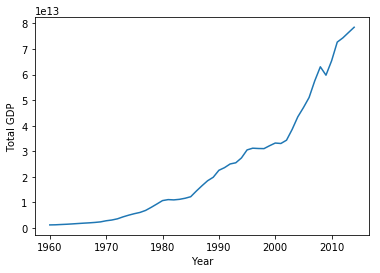

In [80]:
gdp_per_year = gdp_metadata_merged.sum()
gdp_plot = pd.DataFrame({'Year':gdp_per_year.index, 'TotalGDP':gdp_per_year.values})
gdp_plot['Year'] = gdp_plot['Year'].astype('int')

pyplot.xlabel("Year")
pyplot.ylabel("Total GDP")
pyplot.plot(gdp_plot['Year'],gdp_plot['TotalGDP'])
pyplot.show()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


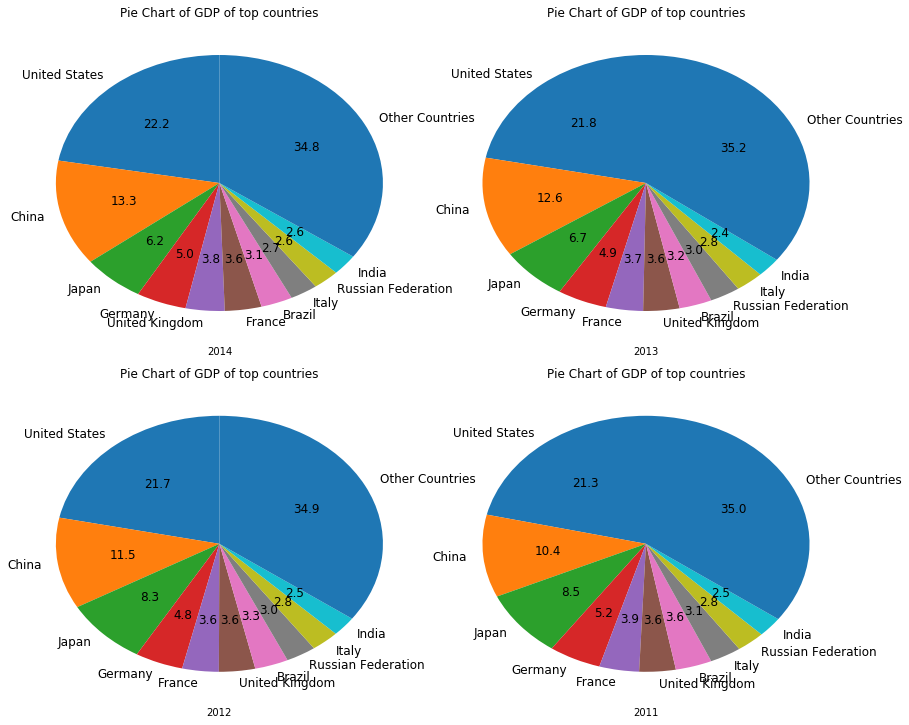

In [96]:
pieplot(gdp_metadata_merged,4,"Pie Chart of GDP of top countries")
pyplot.tight_layout()

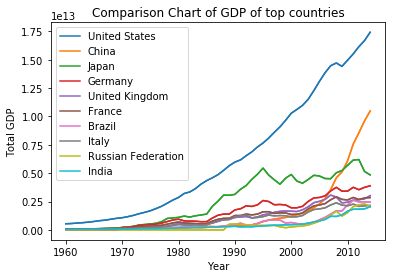

In [83]:
multilineplot(gdp_metadata_merged,top10_gdp.reset_index(drop=True),'Year', 'Total GDP','Comparison Chart of GDP of top countries' )

<h3>POPULATION ANALYSIS</h3>

In [88]:
population = pd.read_csv("/BusinessIntelligence/Datasets/Population/population_data_worldbank.csv",index_col=False,header=2)

population = population[population.columns[:-5]]

del population['Indicator Name']
del population['Indicator Code']

population= population.fillna(0)
population.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Aruba,ABW,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,...,100031.0,100832.0,101220.0,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0
1,Afghanistan,AFG,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,10152331.0,10372630.0,...,25070798.0,25893450.0,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0
2,Angola,AGO,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,6309770.0,6414995.0,...,19552542.0,20262399.0,20997687.0,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0
3,Albania,ALB,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,...,3011487.0,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0
4,Andorra,AND,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,...,78867.0,80991.0,82683.0,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0


In [89]:
metadata_country_population = pd.read_csv("/BusinessIntelligence/Datasets/Population/metadata_country_population.csv",header=0)
metadata_country_population = metadata_country_population[['Country Code', 'Region', 'IncomeGroup']]
metadata_country_population = metadata_country_population.dropna()
metadata_country_population.head()

,Country Code,Region,IncomeGroup
0,ABW,Latin America & Caribbean,High income
1,AFG,South Asia,Low income
2,AGO,Sub-Saharan Africa,Lower middle income
3,ALB,Europe & Central Asia,Upper middle income
4,AND,Europe & Central Asia,High income


In [90]:
population_metadata_merged = population.merge(metadata_country_population,on=['Country Code'])
population_metadata_merged = population_metadata_merged.set_index(['Country Name'])
del  population_metadata_merged['Country Code']
del  population_metadata_merged['Region']
del  population_metadata_merged['IncomeGroup']
population_metadata_merged.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,58386.0,58726.0,...,100031.0,100832.0,101220.0,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0
Afghanistan,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,10152331.0,10372630.0,10604346.0,10854428.0,...,25070798.0,25893450.0,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0
Angola,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,6309770.0,6414995.0,6523791.0,6642632.0,...,19552542.0,20262399.0,20997687.0,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0
Albania,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,2081695.0,...,3011487.0,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0
Andorra,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,21890.0,23058.0,...,78867.0,80991.0,82683.0,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0


In [91]:
top10_populated = top10_values(population_metadata_merged,'2014')
top10_populated

,Country Name,2014
1,China,1.364270e+09
2,India,1.293859e+09
3,United States,3.186225e+08
4,Indonesia,2.551311e+08
5,Brazil,2.042131e+08
6,Pakistan,1.855463e+08
7,Nigeria,1.764605e+08
8,Bangladesh,1.594053e+08
9,Russian Federation,1.438197e+08
10,Japan,1.272760e+08


In [92]:
population_per_year = population_metadata_merged.sum()
population_per_year

1960    3.014940e+09
1961    3.055692e+09
1962    3.108379e+09
1963    3.173207e+09
1964    3.238441e+09
1965    3.305101e+09
1966    3.374903e+09
1967    3.444385e+09
1968    3.514639e+09
1969    3.589069e+09
1970    3.664271e+09
1971    3.741545e+09
1972    3.818075e+09
1973    3.893726e+09
1974    3.970035e+09
1975    4.044577e+09
1976    4.117105e+09
1977    4.189387e+09
1978    4.262885e+09
1979    4.338225e+09
1980    4.414335e+09
1981    4.492428e+09
1982    4.573445e+09
1983    4.655199e+09
1984    4.736682e+09
1985    4.819700e+09
1986    4.905221e+09
1987    4.992880e+09
1988    5.081453e+09
1989    5.170172e+09
1990    5.267861e+09
1991    5.355035e+09
1992    5.439047e+09
1993    5.523974e+09
1994    5.607765e+09
1995    5.692526e+09
1996    5.775191e+09
1997    5.857800e+09
1998    5.939330e+09
1999    6.019809e+09
2000    6.099498e+09
2001    6.178999e+09
2002    6.258067e+09
2003    6.337337e+09
2004    6.417179e+09
2005    6.497569e+09
2006    6.578653e+09
2007    6.660

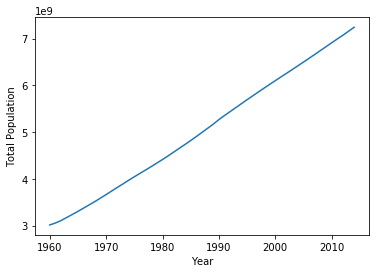

In [93]:
population_per_year = population_metadata_merged.sum()
population_plot = pd.DataFrame({'Year':population_per_year.index, 'TotalPopulation':population_per_year.values})
population_plot['Year'] = population_plot['Year'].astype('int')
pyplot.xlabel("Year")
pyplot.ylabel("Total Population")
pyplot.plot(population_plot['Year'],population_plot['TotalPopulation'])
pyplot.show()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


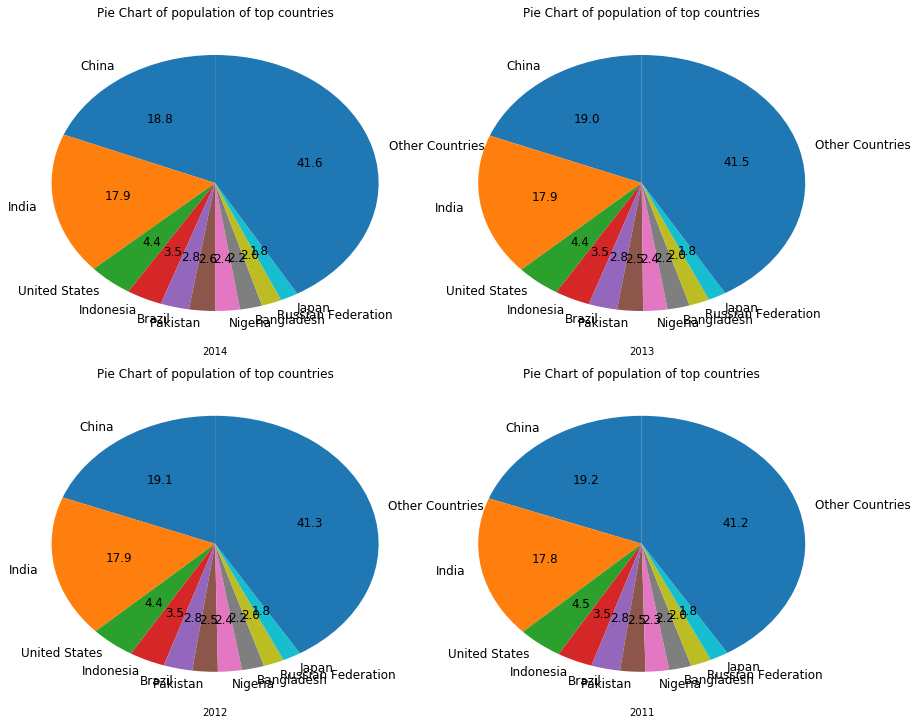

In [94]:
pieplot(population_metadata_merged,4,"Pie Chart of population of top countries")
pyplot.tight_layout()
        
    

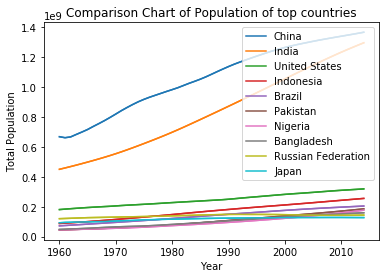

In [95]:
multilineplot(population_metadata_merged,top10_populated.reset_index(drop=True),'Year', 'Total Population','Comparison Chart of Population of top countries' )